<a href="https://colab.research.google.com/github/saiakash23/Crop-Classification-using-Deep-Learning/blob/main/Inception1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download aman2000jaiswal/agriculture-crop-images

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [ ]:
!cp agriculture-crop-images.zip /tmp/

cp: cannot stat 'agriculture-crop-images.zip': No such file or directory


In [ ]:
local_zip = '/tmp/agriculture-crop-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!cp -r /tmp/crop_images /content/drive/MyDrive/

In [ ]:
!cp -r /tmp/test_crop_image /content/drive/MyDrive/crops_filtered/

In [ ]:
!cp -r /content/drive/MyDrive/crops_filtered /tmp/

In [ ]:
base_dir = '/tmp/crops_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training jute pictures
train_jute_dir = os.path.join(train_dir, 'jute')

# Directory with our training maize pictures
train_maize_dir = os.path.join(train_dir, 'maize')

# Directory with our training rice pictures
train_rice_dir = os.path.join(train_dir, 'rice')

# Directory with our training sugarcane pictures
train_sugarcane_dir = os.path.join(train_dir, 'sugarcane')

# Directory with our training wheat pictures
train_wheat_dir = os.path.join(train_dir, 'wheat')

# Directory with our validation jute pictures
validation_jute_dir = os.path.join(validation_dir, 'jute')

# Directory with our validation maize pictures
validation_maize_dir = os.path.join(validation_dir, 'maize')

# Directory with our validation rice pictures
validation_rice_dir = os.path.join(validation_dir, 'rice')

# Directory with our validation sugarcane pictures
validation_sugarcane_dir = os.path.join(validation_dir, 'sugarcane')

# Directory with our validation wheat pictures
validation_wheat_dir = os.path.join(validation_dir, 'wheat')

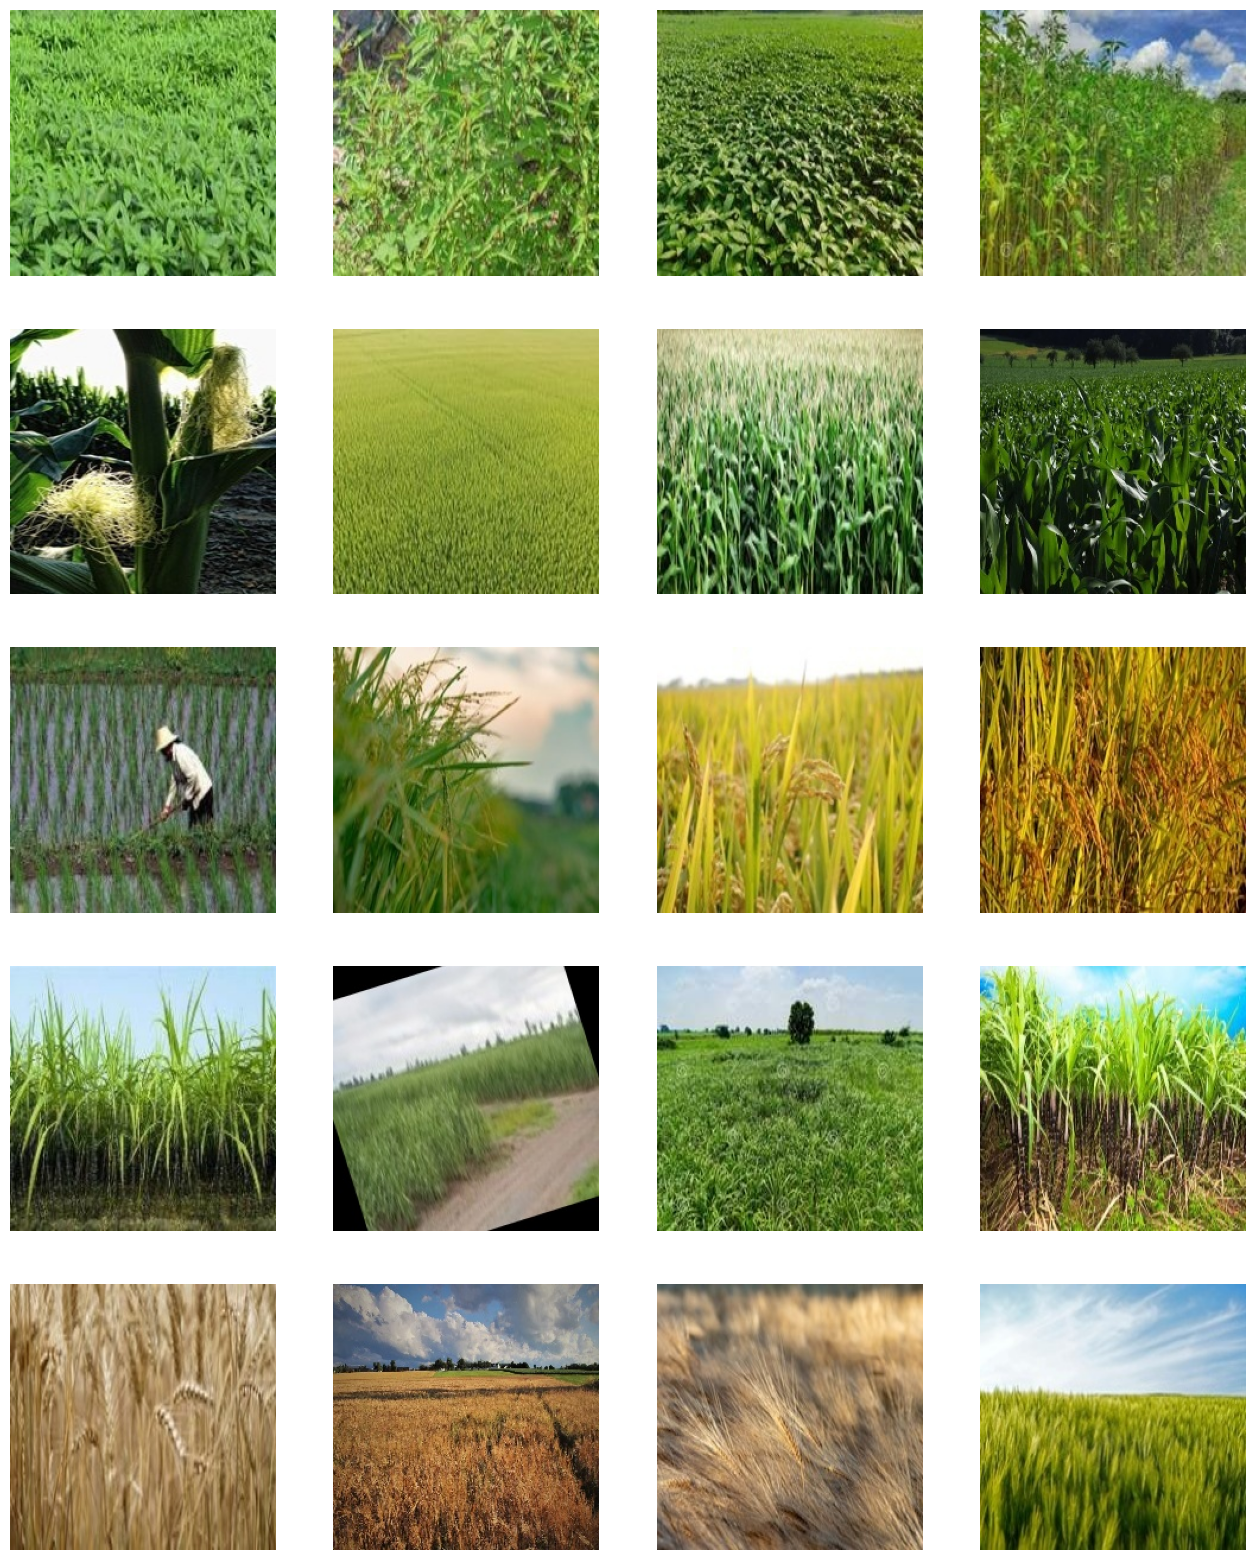

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 5
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 0
train_jute_fnames = os.listdir( train_jute_dir )
train_maize_fnames = os.listdir( train_maize_dir )
train_rice_fnames = os.listdir( train_rice_dir )
train_sugarcane_fnames = os.listdir( train_sugarcane_dir )
train_wheat_fnames = os.listdir( train_wheat_dir )


next_jute_pix = [os.path.join(train_jute_dir, fname)
                for fname in train_jute_fnames[ pic_index:pic_index+4]
               ]

next_maize_pix = [os.path.join(train_maize_dir, fname)
                for fname in train_maize_fnames[ pic_index:pic_index+4]
               ]

next_rice_pix = [os.path.join(train_rice_dir, fname)
                for fname in train_rice_fnames[ pic_index:pic_index+4]
               ]

next_sugarcane_pix = [os.path.join(train_sugarcane_dir, fname)
                for fname in train_sugarcane_fnames[ pic_index:pic_index+4]
               ]

next_wheat_pix = [os.path.join(train_wheat_dir, fname)
                for fname in train_wheat_fnames[ pic_index:pic_index+4]
               ]


for i, img_path in enumerate(next_jute_pix+next_maize_pix+next_rice_pix+next_sugarcane_pix+next_wheat_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,vertical_flip =True, fill_mode='nearest')
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 64, class_mode = 'categorical', target_size = (224, 224), classes=['jute','maize','rice','sugarcane','wheat'])
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 64, class_mode = 'categorical', target_size = (224, 224), classes=['jute','maize','rice','sugarcane','wheat'])

Found 804 images belonging to 5 classes.
Found 45 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224,224, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, regularizers

# x = layers.Flatten()(base_model.output)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.3)(x)
num_classes=5
# x = layers.Dense(num_classes, activation='softmax')(x)
model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

#model = tf.keras.models.Model(base_model.input, x)

#model.compile(optimizer = Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
#inc_history = model.fit_generator(train_generator, validation_data = validation_generator,  steps_per_epoch=len(train_generator), epochs = 50, validation_steps=len(validation_generator))
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
13/13 [==============================] - 21s 1s/step - loss: 20.7412 - acc: 0.2201 - val_loss: 8.0505 - val_acc: 0.2000
Epoch 2/50
13/13 [==============================] - 14s 1s/step - loss: 7.9541 - acc: 0.3433 - val_loss: 3.8726 - val_acc: 0.3556
Epoch 3/50
13/13 [==============================] - 15s 1s/step - loss: 4.0905 - acc: 0.3582 - val_loss: 3.4133 - val_acc: 0.3111
Epoch 4/50
13/13 [==============================] - 13s 979ms/step - loss: 3.3497 - acc: 0.3483 - val_loss: 3.4202 - val_acc: 0.2889
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 3.1341 - acc: 0.4328 - val_loss: 3.0629 - val_acc: 0.4444
Epoch 6/50
13/13 [==============================] - 12s 936ms/step - loss: 3.0436 - acc: 0.4192 - val_loss: 3.0857 - val_acc: 0.3778
Epoch 7/50
13/13 [==============================] - 12s 911ms/step - loss: 2.9275 - acc: 0.4266 - val_loss: 2.9870 - val_acc: 0.3111
Epoch 8/50
13/13 [==============================] - 12s 905ms/step - loss: 2.824

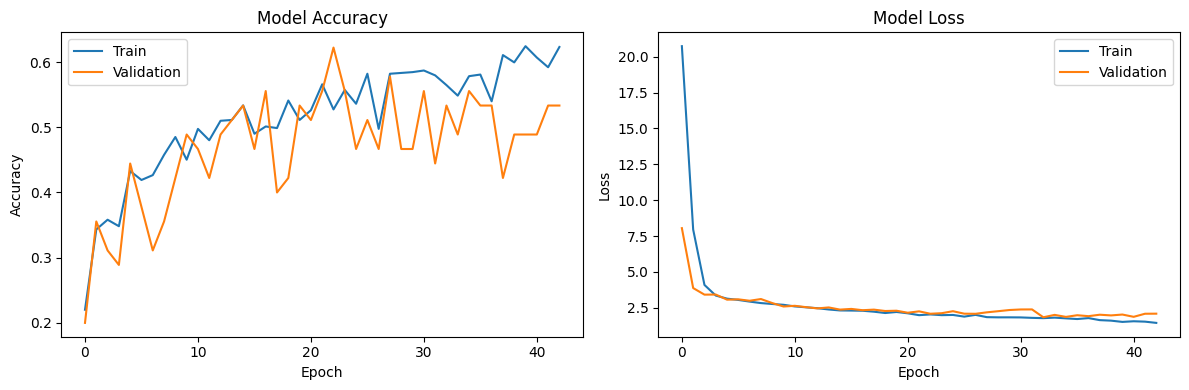

1/1 [==============================] - 6s 6s/step
Classification Report:
               precision    recall  f1-score   support

        jute       0.00      0.00      0.00         9
       maize       0.00      0.00      0.00         7
        rice       0.00      0.00      0.00         8
   sugarcane       0.05      0.12      0.07         8
       wheat       0.21      0.23      0.22        13

    accuracy                           0.09        45
   macro avg       0.05      0.07      0.06        45
weighted avg       0.07      0.09      0.08        45



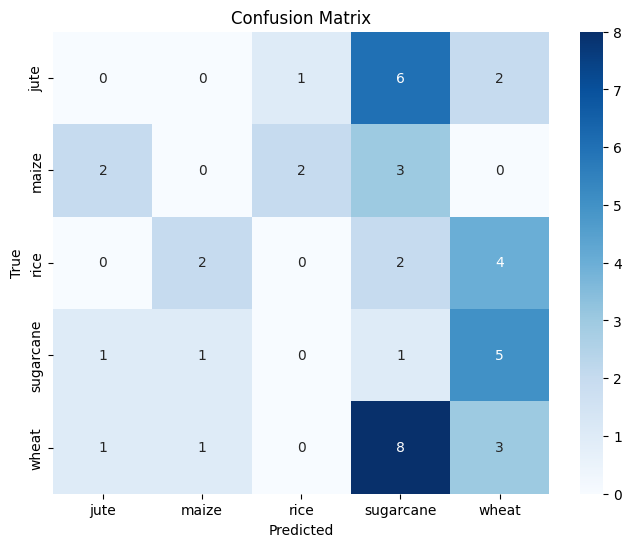

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to summarize diagnostics
def summarize_diagnostics(history):
    # Plot training and validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'], label='Train')
    plt.plot(history.history['val_acc'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Generate predictions
    y_pred = model.predict(validation_generator)

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Convert validation set labels to class labels
    y_true = validation_generator.classes

    # Generate and print classification report
    class_report = classification_report(y_true, y_pred_classes, target_names=['jute', 'maize', 'rice', 'sugarcane', 'wheat'])
    print("Classification Report:\n", class_report)

    # Generate and plot confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['jute', 'maize', 'rice', 'sugarcane', 'wheat'],
                yticklabels=['jute', 'maize', 'rice', 'sugarcane', 'wheat'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Call the function with the training history
summarize_diagnostics(history)
